In [1]:
#dataframes
import pandas as pd
import h5py

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
from scipy.spatial.distance import cdist
from scipy import signal
from scipy import stats
from scipy import fft

#plots
import figurefirst
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()

#misc
import time
np.set_printoptions(suppress=True)

In [36]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/Forest/'
df = pd.read_hdf(dir+'Forest.h5')

In [37]:
sensor_dir = []
for i in range(len(df)):
    sensor_dir.append(np.arctan2(df.gps_linear_y[i],df.gps_linear_x[i]))
                      

## Functions

In [38]:
def fft_of_data(data,dt):
    data = data-np.mean(data)
    N = data.shape[0] # Length of data.
    try:
        yf = 2.0/N * np.abs(fft.fft(data)[0:N//2])# Divide to bring the magnitude to the magnitude of the orginal sinewave.
    except ZeroDivisionError:
        yf= 0

    # Remember the the y-data will be complex so you have to take the absolute value.
    xf = fft.fftfreq(N,dt)[:N//2]# Only take the first half of the data.
#     amp.append(yf)
#     freq.append(xf)
    return(xf, yf) # xf = frequency array. yf = amplitude or power.

In [39]:
# This is a usefull function for segmenting pandas dataframes.
# Input: dataframe,column to use for query, limits.
# Use query to extract segments of data.
def segment_data(df, column_title, lower_lim, upper_lim):
    q = column_title + ' < ' + str(upper_lim) + ' and ' + column_title + ' > ' + str(lower_lim)
    new_df = df.query(q)
    return(new_df)

In [40]:
amp = []
freq = []
dt=df.master_time[1]-df.master_time[0]
xf2,yf2 = fft_of_data(np.array(sensor_dir),dt)

<ipython-input-43-09a6fb081273>:2: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(xf), np.log10(yf), label='Wind_Speed < 3m/s')
<ipython-input-43-09a6fb081273>:3: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(xf1), np.log10(yf1), label='Wind_Speed > 3m/s', alpha=0.6)
<ipython-input-43-09a6fb081273>:4: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(xf2), np.log10(yf2), label='Forest', alpha=0.3)


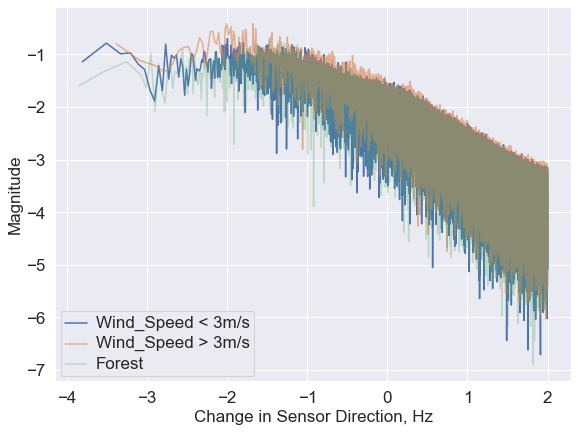

In [43]:
f,ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(np.log10(xf), np.log10(yf), label='Wind_Speed < 3m/s')
ax.plot(np.log10(xf1), np.log10(yf1), label='Wind_Speed > 3m/s', alpha=0.6)
ax.plot(np.log10(xf2), np.log10(yf2), label='Forest', alpha=0.3)
ax.set_xlabel('Change in Sensor Direction, Hz')
ax.set_ylabel('Magnitude')
ax.legend()
f.tight_layout(pad=1)
figurefirst.mpl_functions.set_fontsize(f, 17)

f.savefig('../../Figure/Alllogscaledfft.jpeg', dpi=300, bbox_inches = "tight")
# fig.savefig('../../Figure/notwindylogscaledfft.jpeg')
# ax_s.set_xlim(0,30)

In [12]:
amp = []
freq = []
dt=df.master_time[1]-df.master_time[0]
avg_dist = []
i=0
# while i<=1288287: #notwindy
# while i<=566566: #notwindycontinuous
while i<=483483: #windy
# while i<=345345: #windycontinuous
    fft_of_data(np.array(df.odor[i:i+1001]),dt)
    avg_dist.append(np.mean(df.distance_from_source[i:i+1001]))
    i+=1001

In [111]:
index1 = np.where(np.array(avg_dist)<=10)
index2 = np.where((np.array(avg_dist)>10) & (np.array(avg_dist)<=30))
index3 = np.where(np.array(avg_dist)>30)


# dist_close_freq = np.vstack(freq)[index1]
# dist_close_amp = np.vstack(amp)[index1]
# dist_middle_freq = np.vstack(freq)[index2]
# dist_middle_amp = np.vstack(amp)[index2]
# dist_far_freq = np.vstack(freq)[index3]
# dist_far_amp = np.vstack(amp)[index3]

In [109]:
l = []
for i in range (len(dist_close_freq)):
    l.append((np.vstack((dist_close_amp[i],dist_close_freq[i])).T))
fftdf = pd.DataFrame()
  
y=[]
z=[]
for i in range(len(l)):
    y.append(l[i][:,0])
    z.append(l[i][:,1])
    
fftdf['amplitude'] = np.array(y).flatten()
fftdf['frequency'] = np.array(z).flatten()
# fftdf['distance'] = dist_close

In [96]:
# distance = []
# for i in range (len(l)):
#     distance.append(np.repeat(avg_dist[i],1001))
# fftdf['distance'] = np.array(distance).flatten()

In [7]:
# fftdf = fftdf.sort_values(by=['amplitude'])
# fftdf.reset_index(inplace=True, drop=True)


# x = []
# for i in range(len(l)):
#     j=0
#     while j<1001:
#         x.append(i)
#         j+=1
# fftdf['sno']=x  

In [80]:
x = np.linspace(0,189,50)  #sequence
y = np.linspace(0,100,10) #frequency

H1, x, y = np.histogram2d(fftdf.sno, fftdf.frequency, bins=(x, y), 
                          weights = fftdf.amplitude)
H1 = H1.T 

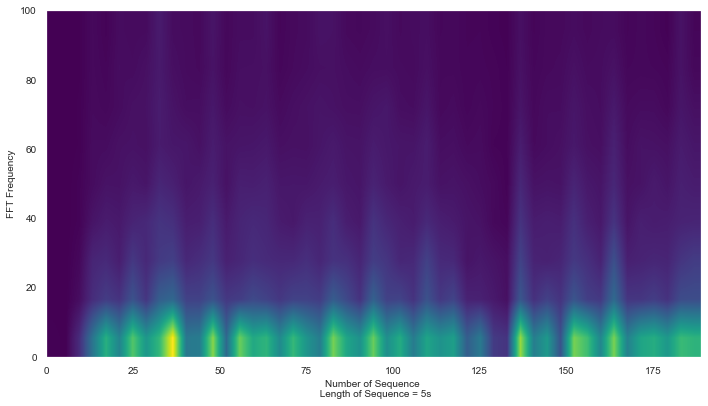

In [82]:
f, ax = plt.subplots(1,1, figsize =(10,10))

ax.set_xlabel('Number of Sequence \n Length of Sequence = 5s' , fontsize = 13)
ax.set_ylabel('FFT Frequency' , fontsize = 13)
var2 = ax.imshow(H1, interpolation='bilinear', origin='lower',
                 cmap = 'viridis', extent=[x[0], x[-1], y[0], y[-1]])
start, end = ax.get_xlim()
ax.grid(False)
f.tight_layout()
figurefirst.mpl_functions.set_fontsize(f, 10)
f.tight_layout()
# f.savefig('../../Figure/notwindymiddle.jpeg')

In [86]:
# # Create new Figure with black background
# k = np.arange(0,len(dist_close_freq),1)
# f = plt.figure(figsize=(10,10))
# # f.suptitle('FFT for Dist < 10meter')
# ax = f.add_subplot(projection='3d')
# ax.get_yaxis().set_visible(False)
# for i in range(len(dist_close_freq)):
#     ax.plot(dist_close_freq[i],dist_close_amp[i],zs=k[i], zdir='y', label='curve in (x, y)')

# ax.view_init(elev=0., azim=90)
# ax.set_xlabel('Frequency(Hz)')
# # ax.set_ylabel('Number of Sequence')
# ax.set_zlabel('Amplitude')

# #Removing yticks which are number of sequence
# ax.yaxis.set_ticklabels([])
# for line in ax.yaxis.get_ticklines():
#     line.set_visible(False)

# f.tight_layout()
# figurefirst.mpl_functions.set_fontsize(f, 12)
# # # f.savefig('../../Figure/FFTCloseDist90.jpeg')

In [112]:
# Combine fft data and put into the SVD
arr_ffts = np.vstack(amp) #np.array([yf1,yf2])
U1,S1,V1 = np.linalg.svd(arr_ffts.T, full_matrices = False) #Take the SVD to get U,S,V.


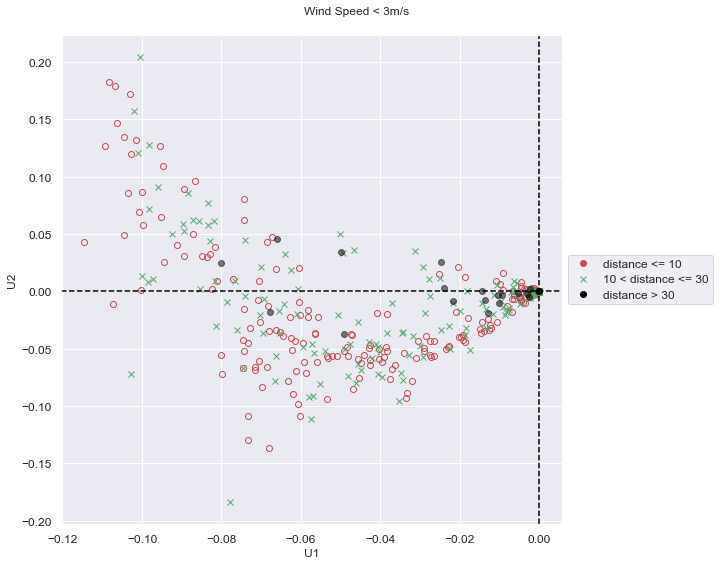

In [114]:
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(V1[0,index1],V1[1,index1],'o', c='r', label='distance <= 10', fillstyle='none')
ax.plot(V1[0,index2],V1[1,index2],'x', c='g', label='10 < distance <= 30')
ax.plot(V1[0,index3],V1[1,index3],'o', c='black',alpha=0.5, label='distance > 30')


ax.axhline(0, linestyle = 'dashed', c = 'black')
ax.axvline(0, linestyle = 'dashed', c = 'black')

ax.set_xlabel('U1')
ax.set_ylabel('U2')

custom_lines = [Line2D([0], [0], color='r',lw=0, marker='o'),
                Line2D([0], [0], color='g', lw=0, marker ='x'),
                Line2D([0], [0], color='black', lw=0, marker='o', markerfacecolor='black')]

ax.legend(custom_lines, ['distance <= 10', '10 < distance <= 30', 'distance > 30'], 
          loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Wind Speed < 3m/s')
fig.tight_layout()
figurefirst.mpl_functions.set_fontsize(fig, 12)

fig.savefig('../../Figure/SVDNotWindyCont.jpeg')

## Code

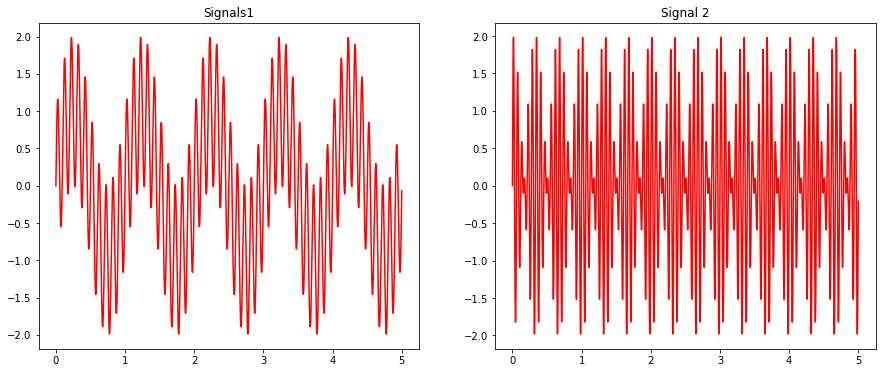

In [105]:
# Simulation of some data
dt = 0.001
t = np.arange(0,5,dt)
w1 = 1# Ws are signal frequencies.
w2 = 10
w3 = 15
w4 = 18
signal1 = np.sin(w1*2*np.pi*t)+np.sin(w2*2*np.pi*t)# Sin wave with two frequencies
signal2 = np.sin(w3*2*np.pi*t)+np.sin(w4*2*np.pi*t)# Sin wave with two frequencies

fig = plt.figure(figsize=[15,6])
ax_s = fig.add_subplot(1,2,1)
ax_s.plot(t,signal1, 'r')
ax_s.set_title('Signals1')

ax_s1 = fig.add_subplot(1,2,2)
ax_s1.plot(t,signal2, 'r')
ax_s1.set_title('Signal 2')

plt.show()

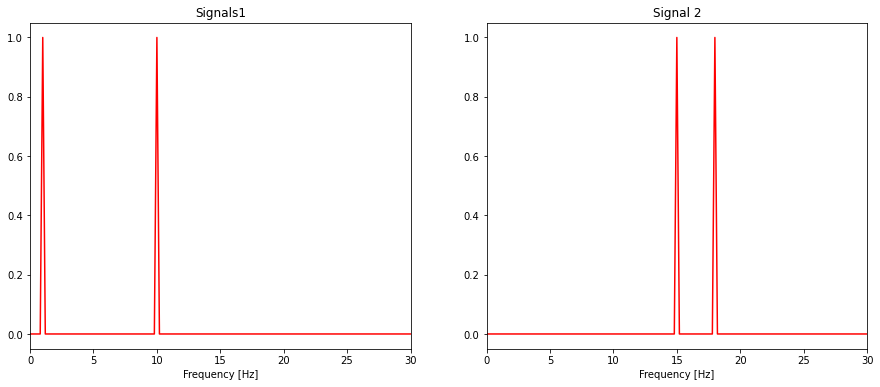

In [106]:
# Get frequency content
xf1, yf1 = fft_of_data(signal1, dt)
xf2, yf2 = fft_of_data(signal2, dt)

fig = plt.figure(figsize=[15,6])
ax_s = fig.add_subplot(1,2,1)
ax_s.plot(xf1, yf1, 'r')
ax_s.set_title('Signals1')
ax_s.set_xlabel('Frequency [Hz]')
ax_s.set_xlim(0,30)

ax_s1 = fig.add_subplot(1,2,2)
ax_s1.plot(xf2, yf2, 'r')
ax_s1.set_title('Signal 2')
ax_s1.set_xlabel('Frequency [Hz]')
ax_s1.set_xlim(0,30)

plt.show()

# Observe where the spikes are.

In [57]:
# Combine fft data and put into the SVD
arr_ffts = np.vstack(np.abs(amp)) #np.array([yf1,yf2])
U,S,V = np.linalg.svd(arr_ffts.T, full_matrices = False) #Take the SVD to get U,S,V.

In [117]:
U.shape

(1001, 1001)

In [116]:
S.shape

(1001,)

In [114]:
V.shape

(1001, 1288)

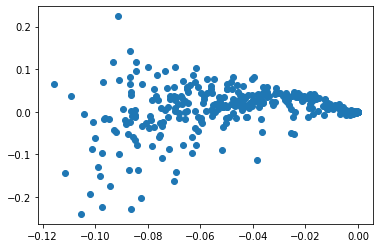

In [58]:
plt.plot(V[0,:],V[1,:],'o')
# plt.xlim(-2,2)
# plt.ylim(-2,2)